# Keras Tutorial


Instructions to install CUDA 8.0, CuDNN, TensorFlow, and Keras can be found [here](https://github.com/jordanott/Useful-Things/blob/master/CUDA.md).



## MNIST Example


![MNIST](Images/mnist.jpg)


## Dependencies

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

from keras.utils import plot_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Data

In [2]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

('x_train shape:', (60000, 28, 28, 1))
(60000, 'train samples')
(10000, 'test samples')


## Build the Model

In [3]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

## View Model

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

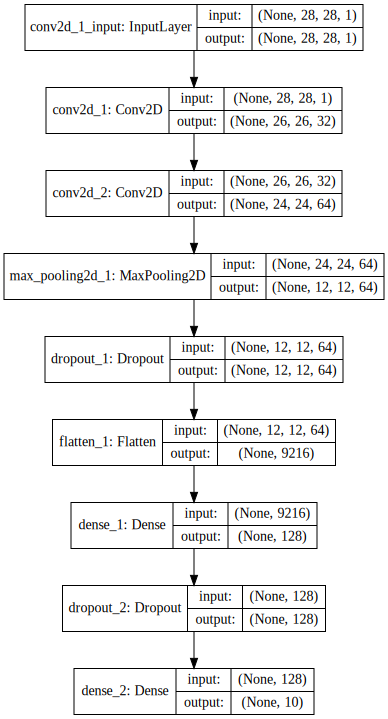

In [5]:
# Use this to save to file
#plot_model(model,show_shapes=True)

# Use this to plot in notebook
SVG(model_to_dot(model,show_shapes=True).create(prog='dot', format='svg'))

## Training


In [6]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 7s - loss: 0.3253 - acc: 0.9020 - val_loss: 0.0710 - val_acc: 0.9773
Epoch 2/12
60000/60000 [==============================] - 6s - loss: 0.1104 - acc: 0.9673 - val_loss: 0.0495 - val_acc: 0.9838
Epoch 3/12
60000/60000 [==============================] - 6s - loss: 0.0831 - acc: 0.9751 - val_loss: 0.0402 - val_acc: 0.9865
Epoch 4/12
60000/60000 [==============================] - 6s - loss: 0.0693 - acc: 0.9791 - val_loss: 0.0367 - val_acc: 0.9871
Epoch 5/12
60000/60000 [==============================] - 6s - loss: 0.0625 - acc: 0.9813 - val_loss: 0.0328 - val_acc: 0.9883
Epoch 6/12
60000/60000 [==============================] - 6s - loss: 0.0544 - acc: 0.9844 - val_loss: 0.0311 - val_acc: 0.9890
Epoch 7/12
60000/60000 [==============================] - 6s - loss: 0.0498 - acc: 0.9855 - val_loss: 0.0300 - val_acc: 0.9894
Epoch 8/12
60000/60000 [==============================] - 6s 

## Testing


In [7]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

('Test loss:', 0.030485128437450475)
('Test accuracy:', 0.98999999999999999)


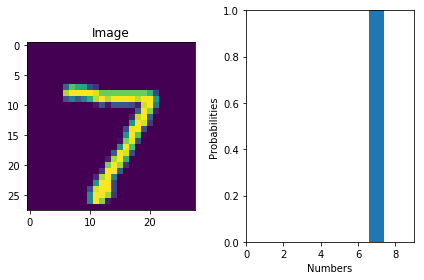

In [9]:
prob = model.predict(x_test[0].reshape(1,28,28,1))[0]

plt.subplot(1, 2, 1)
plt.imshow(x_test[0].reshape(28,28))
plt.title('Image')

nums = np.arange(10)
plt.subplot(1, 2, 2)
plt.bar(nums, prob)
plt.axis([0, 9, 0, 1])

plt.xlabel('Numbers')
plt.ylabel('Probabilities')
plt.tight_layout()

plt.show()

## Saving Weights

In [10]:
model.save_weights('weights.h5')

## Load Weights


In [11]:
model.load_weights('weights.h5')

# Pretrained Models


In [12]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Input
from keras import backend as K

In [13]:
input_shape = (300,300,3)
input_tensor = Input(shape=input_shape)
base_model = VGG16(input_tensor=input_tensor,weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
#x = Dense(1024, activation='relu')(x)
# output layer with 'num_classes' number of catergories
predictions = Dense(num_classes, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 300, 300, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 300, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 300, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 150, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 150, 150, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 150, 150, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 75, 75, 128)       0         
__________